# Huber Loss

> In this post, we'll walk through how to create custom loss functions. In particular, we'll code the [Huber Loss](https://en.wikipedia.org/wiki/Huber_loss) and use that in training the model. This is the summary of lecture "Custom Models, Layers and Loss functions with Tensorflow" from DeepLearning.AI.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow, DeepLearining.AI]
- image: 

## Packages

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Prepare the Data

Our dummy dataset is just a pair of arrays `xs` and `ys` defined by the relationship $y = 2x - 1$. `xs` are the inputs while `ys` are the labels.

In [2]:
# inputs
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

# labels
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

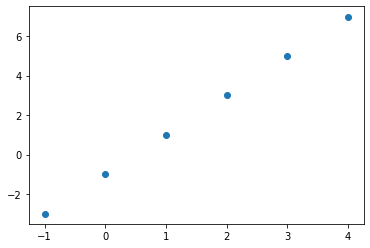

In [12]:
plt.scatter(xs, ys);

## Training the model

Let's build a simple model and train using a built-in loss function like the `mean_squared_error`.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500, verbose=0)

In [15]:
y_mse = model.predict([10.0])
y_mse

array([[18.977274]], dtype=float32)

## Training with Custom Loss

Now let's see how we can use a custom loss. We first define a function that accepts the ground truth labels (`y_true`) and model predictions (`y_pred`) as parameters. We then compute and return the loss value in the function definition.

The definition of Huber Loss is like this:

$$
L_{\delta}(a) = 
\begin{cases}
    \frac{1}{2} (y - f(x))^2 \quad & \text{ for } \vert a \vert \le \delta, \\
    \delta (\vert y - f(x) \vert - \frac{1}{2} \delta) \quad & \text{ otherwise} \\
\end{cases}
$$

In [17]:
def my_huber_loss(y_true, y_pred):
    threshold = 1
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - threshold / 2)
    return tf.where(is_small_error, small_error_loss, big_error_loss)

Using the loss function is as simple as specifying the loss function in the `loss` argument of `model.compile()`.

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1,])
])

model.compile(optimizer='sgd', loss=my_huber_loss)
model.fit(xs, ys, epochs=500, verbose=0)

In [19]:
y_hl = model.predict([10.0])
y_hl

array([[18.325588]], dtype=float32)

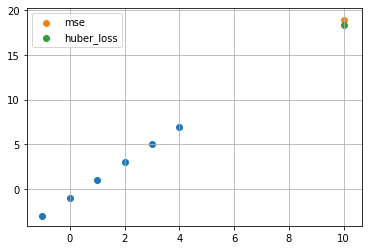

In [25]:
plt.scatter(xs, ys);
plt.scatter(10.0, y_mse, label='mse');
plt.scatter(10.0, y_hl, label='huber_loss');
plt.grid()
plt.legend();